# Importing all required libraries



---



In [86]:
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
warnings.filterwarnings("ignore")

# Exploratory data analysis and data Cleansing



---



## 1. Download the dataset

In [2]:
!gdown 1PLE_WEdgAIWZ4BXhjfbmhlqE7VZgT6QY

Downloading...
From: https://drive.google.com/uc?id=1PLE_WEdgAIWZ4BXhjfbmhlqE7VZgT6QY
To: /content/nilaiif.csv
100% 14.6M/14.6M [00:00<00:00, 27.1MB/s]




---



## 2. Loading the data into the data frame.

In [3]:
df = pd.read_csv("nilaiif.csv")
# To display the top 10 rows
df.head(10)

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
0,NIM,MUHAMAD AZHAR,20051,KP8700,2.0,Kerja Praktek,20122,NaN
1,NIM,MUHAMAD AZHAR,20051,KM8800,1.0,Komprehensif,20122,NaN
2,NIM,MUHAMAD AZHAR,20051,TA8800,4.0,Tugas AkhirSkripsi,20122,NaN
3,NIM,ABDUL HANAN,20061,705101,2.0,AlQuran Dan Ilmu Tafsir,20061,A
4,NIM,ABDUL HANAN,20061,705104,2.0,Bahasa Arab I,20061,A
5,NIM,ABDUL HANAN,20061,705102,2.0,Bahasa Indonesia,20061,B
6,NIM,ABDUL HANAN,20061,705103,2.0,Bahasa Inggris,20061,B
7,NIM,ABDUL HANAN,20061,705106,3.0,Fisika Dasar,20061,C
8,NIM,ABDUL HANAN,20061,705105,3.0,Kalkulus I,20061,D
9,NIM,ABDUL HANAN,20061,705108,3.0,Kimia Dasar,20061,C


In [4]:
df.tail(10)                        # To display the bottom 10 rows

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
192026,1237050151,OMAR HASSAN NOR,20231,201004-705-01-003,1.0,Praktikum Dasar Pemrograman,20231,NaN
192027,1237050151,OMAR HASSAN NOR,20231,201004-705-01-004,3.0,Kalkulus I,20231,NaN
192028,1237050151,OMAR HASSAN NOR,20231,201004-705-02-007,2.0,Ilmu Fiqih,20231,NaN
192029,1237050151,OMAR HASSAN NOR,20231,201004-705-02-010,2.0,Bahasa Arab,20231,NaN
192030,1237050151,OMAR HASSAN NOR,20231,201004-705-02-011,2.0,Bahasa Inggris I,20231,NaN
192031,1237050151,OMAR HASSAN NOR,20231,201004-705-02-013,2.0,Fisika Dasar,20231,NaN
192032,1237050151,OMAR HASSAN NOR,20231,201004-705-02-014,1.0,Praktikum Fisika Dasar,20231,NaN
192033,1237050151,OMAR HASSAN NOR,20231,201004-705-03-001,2.0,Olah Raga,20231,NaN
192034,1237050151,OMAR HASSAN NOR,20231,201004-705-03-011,NaN,Praktek Tilawah,20231,NaN
192035,1237050151,OMAR HASSAN NOR,20231,201004-705-02-002,1.0,Kewarganegaraan,20231,NaN


In [5]:
# dataframe backup
df_orig = df.copy()



---



## 3. Checking the types of data

In [6]:
df.dtypes

NIM                  object
Nama                 object
Angkatan              int64
Kode MK              object
SKS                 float64
Nama Mata Kuliah     object
Periode Semester      int64
Nilai Huruf          object
dtype: object

In [7]:
# Change NIM to String
df["NIM"] = df["NIM"].astype(str)



---



## 4. Change Nama Mata Kuliah

In [8]:
matkul_orig = df["Nama Mata Kuliah"].unique()
matkul_name = [x.upper() for x in matkul_orig]

In [9]:
# @title 5.1 Helper Function
def find_matkul_df(dataframe, nama_mk, nim=None, matkul_list=matkul_orig):
  this_dict = find_matkul(matkul_list, nama_mk)
  list_mk = pd.DataFrame({}, columns=dataframe.columns)
  if nim != None:
    for i in this_dict.values():
      list_mk = list_mk.append(dataframe.loc[(dataframe['NIM'] == nim) & (dataframe['Nama Mata Kuliah'].apply(lambda x: x.upper()) == str(i).upper())])
  else :
    for i in this_dict.values():
      list_mk = list_mk.append(dataframe.loc[dataframe['Nama Mata Kuliah'].apply(lambda x: x.upper()) == str(i).upper()])
  return(list_mk)

def find_matkul(list_array, string_finder):
  this_dict = {}
  for idx, val in enumerate(list_array):
    if string_finder.upper() in val.upper():
      this_dict.update({idx: val})
  return this_dict

In [10]:
# @title 5.2 Matkul List { vertical-output: true }
for idx, val in enumerate(matkul_orig):
  print(str(idx) + " " + val)

0 Kerja Praktek
1 Komprehensif
2 Tugas AkhirSkripsi
3 AlQuran Dan Ilmu Tafsir
4 Bahasa Arab I
5 Bahasa Indonesia
6 Bahasa Inggris
7 Fisika Dasar
8 Kalkulus I
9 Kimia Dasar
10 Pendidikan Pancasila dan Kewarganegaraan
11 Pengantar Teknologi Informasi
12 Pengetahuan Lingkungan
13 Praktik Ibadah
14 Algoritma dan Pemrograman
15 Aljabar Linier
16 Bahasa Arab II
17 English Communication Skill
18 Hadits dan Ilmu Hadits
19 Ilmu Budaya Dasar  Ilmu Sosial Dasar
20 Ilmu Fiqih
21 Ilmu TauhidAqidah
22 Kalkulus II
23 Komputer dan Masyarakat
24 Praktik Tilawah
25 Komunikasi Data
26 Logika Informatika
27 Organisasi  Arsitektur Komputer
28 Pengantar Basis Data
29 Probabilitas dan Statistika
30 Sistem Informasi
31 Grafika Komputer
32 Jaringan Komputer
33 Matematika Diskrit
34 Metode Numerik
35 Rekayasa Perangkat Lunak I 
36 Sistem Operasi
37 Sistem Teknologi Basis Data
38 Sejarah Peradaban Islam
39 Struktur Data
40 Etika Profesi
41 Interpersonal Skill
42 Pemrograman Berorientasi Objek
43 Rekayasa Perangk

In [11]:
find_matkul(matkul_orig, "AKHLA")

{58: 'Akhlak Tasawuf', 118: 'Akhlaq Tasawuf'}

In [12]:
# @title 5.3 Matkul Name Changed { vertical-output: true }
index_changed = []
for idx, i in enumerate(matkul_name):
  if i == matkul_name[0]:
    matkul_name[0] = "KERJA PRAKTEK/MAGANG"
    index_changed.append(idx)
  elif i == matkul_name[2]:
    matkul_name[2] = "TUGAS AKHIR DAN SEMINAR"
    index_changed.append(idx)
  elif i == matkul_name[3]:
    matkul_name[3] = "ULUMUL QURAN"
    index_changed.append(idx)
  elif i == matkul_name[4]:
    matkul_name[4] = "BAHASA ARAB"
    index_changed.append(idx)
  elif i == matkul_name[10]:
    matkul_name[10] = "PANCASILA"
    index_changed.append(idx)
  elif i == matkul_name[11]:
    matkul_name[11] = "PENGENALAN INFORMATIKA"
    index_changed.append(idx)
  elif i == matkul_name[13]:
    matkul_name[13] = "PRAKTEK IBADAH"
    index_changed.append(idx)
  elif i == matkul_name[17]:
    matkul_name[17] = "BAHASA INGGRIS II"
    index_changed.append(idx)
  elif i == matkul_name[18]:
    matkul_name[18] = "ULUMUL HADITS"
    index_changed.append(idx)
  elif i == matkul_name[21]:
    matkul_name[21] = "ILMU TAUHID"
    index_changed.append(idx)
  elif i == matkul_name[24]:
    matkul_name[24] = "PRAKTEK IBADAH"
    index_changed.append(idx)
  elif i == matkul_name[26]:
    matkul_name[26] = "LOGIKA KOMPUTASIONAL"
    index_changed.append(idx)
  elif i == matkul_name[27]:
    matkul_name[27] = "ORGANISASI DAN ARSITEKTUR KOMPUTER"
    index_changed.append(idx)
  elif i == matkul_name[35]:
    matkul_name[35] = "REKAYASA PERANGKAT LUNAK"
    index_changed.append(idx)
  elif i == matkul_name[37]:
    matkul_name[37] = "TEKNOLOGI BASIS DATA"
    index_changed.append(idx)
  elif i == matkul_name[39]:
    matkul_name[39] = "ALGORITMA DAN STRUKTUR DATA"
    index_changed.append(idx)
  elif i == matkul_name[43]:
    matkul_name[43] = "REKAYASA PERANGKAT LUNAK LANJUT"
    index_changed.append(idx)
  elif i == matkul_name[54]:
    matkul_name[54] = "E-COMMERCE"
    index_changed.append(idx)
  elif i == matkul_name[55]:
    matkul_name[55] = "KEWIRAUSAHAAN & ETIKA BISNIS"
    index_changed.append(idx)
  elif i == matkul_name[56]:
    matkul_name[56] = "SISTEM BASIS DATA TERDISTRIBUSI"
    index_changed.append(idx)
  elif i == matkul_name[57]:
    matkul_name[57] = "WIRELESS MOBILE COMPUTING"
    index_changed.append(idx)
  elif i == matkul_name[58]:
    matkul_name[58] = "AKHLAQ TASAWUF"
    index_changed.append(idx)
  elif i == matkul_name[60]:
    matkul_name[60] = "KULIAH KERJA MAHASISWA"
    index_changed.append(idx)
  elif i == matkul_name[62]:
    matkul_name[62] = "TUGAS AKHIR DAN SEMINAR"
    index_changed.append(idx)
  elif i == matkul_name[64]:
    matkul_name[64] = "ULUMUL QURAN"
    index_changed.append(idx)
  elif i == matkul_name[67]:
    matkul_name[67] = "ORGANISASI DAN ARSITEKTUR KOMPUTER"
    index_changed.append(idx)
  elif i == matkul_name[81]:
    matkul_name[81] = "KEWIRAUSAHAAN & ETIKA BISNIS"
    index_changed.append(idx)
  elif i == matkul_name[82]:
    matkul_name[82] = "PANCASILA"
    index_changed.append(idx)
  elif i == matkul_name[83]:
    matkul_name[83] = "PRAKTIKUM SISTEM BASIS DATA"
    index_changed.append(idx)
  elif i == matkul_name[85]:
    matkul_name[85] = "BAHASA INGGRIS II"
    index_changed.append(idx)
  elif i == matkul_name[86]:
    matkul_name[86] = "E-COMMERCE"
    index_changed.append(idx)
  elif i == matkul_name[91]:
    matkul_name[91] = "PENGETAHUAN LINGKUNGAN"
    index_changed.append(idx)
  elif i == matkul_name[94]:
    matkul_name[94] = "TEKNIK DIGITAL"
    index_changed.append(idx)
  elif i == matkul_name[104]:
    matkul_name[104] = "PENGEMBANGAN APLIKASI MOBILE"
    index_changed.append(idx)
  elif i == matkul_name[108]:
    matkul_name[108] = "PRAKTIKUM PENGEMBANGAN APLIKASI MOBILE"
    index_changed.append(idx)
  elif i == matkul_name[109]:
    matkul_name[109] = "PRAKTIKUM WIRELESS MOBILE COMPUTING"
    index_changed.append(idx)
  elif i == matkul_name[116]:
    matkul_name[116] = "ALJABAR LINIER"
    index_changed.append(idx)
  elif i == matkul_name[119]:
    matkul_name[119] = "BAHASA INGGRIS"
    index_changed.append(idx)
  elif i == matkul_name[121]:
    matkul_name[121] = "PANCASILA"
    index_changed.append(idx)
  elif i == matkul_name[127]:
    matkul_name[127] = "PRAKTIKUM ALGORITMA DAN STRUKTUR DATA"
    index_changed.append(idx)
  elif i == matkul_name[128]:
    matkul_name[128] = "PENGENALAN INFORMATIKA"
    index_changed.append(idx)
  elif i == matkul_name[129]:
    matkul_name[129] = "PRAKTIKUM PENGEMBANGAN APLIKASI WEB"
    index_changed.append(idx)
  elif i == matkul_name[131]:
    matkul_name[131] = "KERJA PRAKTEK/MAGANG"
    index_changed.append(idx)
  elif i == matkul_name[133]:
    matkul_name[133] = "GRAFIKA KOMPUTER"
    index_changed.append(idx)
  elif i == matkul_name[135]:
    matkul_name[135] = "PRAKTIKUM APLIKASI PLATFORM KHUSUS"
    index_changed.append(idx)
  elif i == matkul_name[136]:
    matkul_name[136] = "PRAKTIKUM JARINGAN KOMPUTER LANJUT"
    index_changed.append(idx)
  elif i == matkul_name[137]:
    matkul_name[137] = "OLAH RAGA"
    index_changed.append(idx)
  elif i == matkul_name[138]:
    matkul_name[138] = "PRAKTIKUM RPL SPESIFIK DOMAIN"
    index_changed.append(idx)
  elif i == matkul_name[139]:
    matkul_name[139] = "KEWIRAUSAHAAN & ETIKA BISNIS"
    index_changed.append(idx)
  elif i == matkul_name[143]:
    matkul_name[143] = "ILMU TAUHID"
    index_changed.append(idx)
  elif i == matkul_name[155]:
    matkul_name[155] = "SOSIO-INFORMATIKA DAN PROFESIONALISME"
    index_changed.append(idx)
  elif i == matkul_name[163]:
    matkul_name[163] = "GRAFIKA KOMPUTER"
    index_changed.append(idx)
# print(index_changed)

for idx, val in enumerate(matkul_name):
  if idx in index_changed:
    print(str(idx) + " " + matkul_orig[idx] + " => " + val)

0 Kerja Praktek => KERJA PRAKTEK/MAGANG
2 Tugas AkhirSkripsi => TUGAS AKHIR DAN SEMINAR
3 AlQuran Dan Ilmu Tafsir => ULUMUL QURAN
4 Bahasa Arab I => BAHASA ARAB
10 Pendidikan Pancasila dan Kewarganegaraan => PANCASILA
11 Pengantar Teknologi Informasi => PENGENALAN INFORMATIKA
13 Praktik Ibadah => PRAKTEK IBADAH
17 English Communication Skill => BAHASA INGGRIS II
18 Hadits dan Ilmu Hadits => ULUMUL HADITS
21 Ilmu TauhidAqidah => ILMU TAUHID
24 Praktik Tilawah => PRAKTEK IBADAH
26 Logika Informatika => LOGIKA KOMPUTASIONAL
27 Organisasi  Arsitektur Komputer => ORGANISASI DAN ARSITEKTUR KOMPUTER
35 Rekayasa Perangkat Lunak I  => REKAYASA PERANGKAT LUNAK
37 Sistem Teknologi Basis Data => TEKNOLOGI BASIS DATA
39 Struktur Data => ALGORITMA DAN STRUKTUR DATA
43 Rekayasa Perangkat Lunak II => REKAYASA PERANGKAT LUNAK LANJUT
54 ecommerce => E-COMMERCE
55 Kewirausahaan => KEWIRAUSAHAAN & ETIKA BISNIS
56 Sistem Basisdata Terdistribusi => SISTEM BASIS DATA TERDISTRIBUSI
57 WirelessMobile Computing

In [13]:
find_matkul(matkul_name, "akhla")

{58: 'AKHLAQ TASAWUF', 118: 'AKHLAQ TASAWUF'}

In [14]:
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
0,NIM,MUHAMAD AZHAR,20051,KP8700,2.0,Kerja Praktek,20122,NaN
1,NIM,MUHAMAD AZHAR,20051,KM8800,1.0,Komprehensif,20122,NaN
2,NIM,MUHAMAD AZHAR,20051,TA8800,4.0,Tugas AkhirSkripsi,20122,NaN
3,NIM,ABDUL HANAN,20061,705101,2.0,AlQuran Dan Ilmu Tafsir,20061,A
4,NIM,ABDUL HANAN,20061,705104,2.0,Bahasa Arab I,20061,A
...,...,...,...,...,...,...,...,...
192031,1237050151,OMAR HASSAN NOR,20231,201004-705-02-013,2.0,Fisika Dasar,20231,NaN
192032,1237050151,OMAR HASSAN NOR,20231,201004-705-02-014,1.0,Praktikum Fisika Dasar,20231,NaN
192033,1237050151,OMAR HASSAN NOR,20231,201004-705-03-001,2.0,Olah Raga,20231,NaN
192034,1237050151,OMAR HASSAN NOR,20231,201004-705-03-011,NaN,Praktek Tilawah,20231,NaN


In [15]:
# Change Nama Mata Kuliah
for idx in index_changed:
  df.loc[df['Nama Mata Kuliah'] == matkul_orig[idx], 'Nama Mata Kuliah'] = matkul_name[idx]

df['Nama Mata Kuliah'] = df['Nama Mata Kuliah'].apply(lambda x: x.upper())
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
0,NIM,MUHAMAD AZHAR,20051,KP8700,2.0,KERJA PRAKTEK/MAGANG,20122,NaN
1,NIM,MUHAMAD AZHAR,20051,KM8800,1.0,KOMPREHENSIF,20122,NaN
2,NIM,MUHAMAD AZHAR,20051,TA8800,4.0,TUGAS AKHIR DAN SEMINAR,20122,NaN
3,NIM,ABDUL HANAN,20061,705101,2.0,ULUMUL QURAN,20061,A
4,NIM,ABDUL HANAN,20061,705104,2.0,BAHASA ARAB,20061,A
...,...,...,...,...,...,...,...,...
192031,1237050151,OMAR HASSAN NOR,20231,201004-705-02-013,2.0,FISIKA DASAR,20231,NaN
192032,1237050151,OMAR HASSAN NOR,20231,201004-705-02-014,1.0,PRAKTIKUM FISIKA DASAR,20231,NaN
192033,1237050151,OMAR HASSAN NOR,20231,201004-705-03-001,2.0,OLAH RAGA,20231,NaN
192034,1237050151,OMAR HASSAN NOR,20231,201004-705-03-011,NaN,PRAKTEK TILAWAH,20231,NaN




---



## 5. Change Kode MK

In [16]:
df = df.sort_values(by=['Periode Semester'], ascending=False)

In [17]:
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
192035,1237050151,OMAR HASSAN NOR,20231,201004-705-02-002,1.0,KEWARGANEGARAAN,20231,NaN
183678,1217050101,MUHAMMAD RAIHAN FIRDAUS,20211,201004-705-01-028,2.0,PENGEMBANGAN APLIKASI MOBILE,20231,NaN
150622,1187050014,BANIE AL AFAF,20181,201004-705-03-006,2.0,KEWIRAUSAHAAN & ETIKA BISNIS,20231,NaN
150621,1187050014,BANIE AL AFAF,20181,201004-705-01-028,2.0,PENGEMBANGAN APLIKASI MOBILE,20231,NaN
150620,1187050014,BANIE AL AFAF,20181,201004-705-01-054,3.0,KEAMANAN KOMPUTER DAN JARINGAN,20231,NaN
...,...,...,...,...,...,...,...,...
6231,206700182,ROBBY TSANIE NURHAFID,20061,705105,3.0,KALKULUS I,20061,C
6230,206700182,ROBBY TSANIE NURHAFID,20061,705106,3.0,FISIKA DASAR,20061,B
6229,206700182,ROBBY TSANIE NURHAFID,20061,705103,2.0,BAHASA INGGRIS,20061,B
6228,206700182,ROBBY TSANIE NURHAFID,20061,705102,2.0,BAHASA INDONESIA,20061,B


In [18]:
kode_mk_split = df[["Kode MK", "Nama Mata Kuliah"]]

In [19]:
kode_mk_split = kode_mk_split.drop_duplicates(subset=["Nama Mata Kuliah"])

In [20]:
list_kode_mk = kode_mk_split.to_dict("split").get('data')



---



In [21]:
# @title 5.1 List Kode MK and MK { vertical-output: true }
for i in list_kode_mk:
  print(i)

['201004-705-02-002', 'KEWARGANEGARAAN']
['201004-705-01-028', 'PENGEMBANGAN APLIKASI MOBILE']
['201004-705-03-006', 'KEWIRAUSAHAAN & ETIKA BISNIS']
['201004-705-01-054', 'KEAMANAN KOMPUTER DAN JARINGAN']
['201004-705-01-024', 'MANAJEMEN BASIS DATA']
['201004-705-01-033', 'INTELEGENSIA BUATAN']
['201004-705-03-005', 'ICT DAN ISLAM']
['201004-705-03-008', 'KAPITA SELEKTA INFORMATIKA']
['201004-705-03-007', 'SOSIO-INFORMATIKA DAN PROFESIONALISME']
['201004-705-01-025', 'PRAKTIKUM MANAJEMEN BASIS DATA']
['201004-705-01-026', 'JARINGAN KOMPUTER']
['201004-705-01-030', 'PENGEMBANGAN APLIKASI WEB']
['201004-705-01-032', 'INTERAKSI MANUSIA DAN KOMPUTER']
['201004-705-01-034', 'MANAJEMEN PROYEK PERANGKAT LUNAK']
['201004-705-01-027', 'PRAKTIKUM JARINGAN KOMPUTER']
['201004-705-01-031', 'PRAKTIKUM PENGEMBANGAN APLIKASI WEB']
['201004-705-01-029', 'PRAKTIKUM PENGEMBANGAN APLIKASI MOBILE']
['201004-705-03-010', 'KOMPREHENSIF']
['201004-705-01-043', 'TUGAS AKHIR DAN SEMINAR']
['201004-705-03-004',

In [22]:
for i in list_kode_mk :
  df.loc[df['Nama Mata Kuliah'] == i[1], 'Kode MK'] = i[0]
df = df.sort_index()

In [23]:
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
0,NIM,MUHAMAD AZHAR,20051,201004-705-03-004,2.0,KERJA PRAKTEK/MAGANG,20122,NaN
1,NIM,MUHAMAD AZHAR,20051,201004-705-03-010,1.0,KOMPREHENSIF,20122,NaN
2,NIM,MUHAMAD AZHAR,20051,201004-705-01-043,4.0,TUGAS AKHIR DAN SEMINAR,20122,NaN
3,NIM,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A
4,NIM,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A
...,...,...,...,...,...,...,...,...
192031,1237050151,OMAR HASSAN NOR,20231,201004-705-02-013,2.0,FISIKA DASAR,20231,NaN
192032,1237050151,OMAR HASSAN NOR,20231,201004-705-02-014,1.0,PRAKTIKUM FISIKA DASAR,20231,NaN
192033,1237050151,OMAR HASSAN NOR,20231,201004-705-03-001,2.0,OLAH RAGA,20231,NaN
192034,1237050151,OMAR HASSAN NOR,20231,201004-705-03-011,NaN,PRAKTEK TILAWAH,20231,NaN


In [24]:
list_mk = find_matkul_df(df,"kalkulus")
display(list_mk)

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
8,NIM,ABDUL HANAN,20061,201004-705-01-004,3.0,KALKULUS I,20061,D
54,206700066,ABDUL HANAN,20061,201004-705-01-004,3.0,KALKULUS I,20091,E
78,206700068,ADE TRI NUGRAHA,20061,201004-705-01-004,3.0,KALKULUS I,20061,C
128,206700068,ADE TRI NUGRAHA,20061,201004-705-01-004,3.0,KALKULUS I,20091,B
150,206700069,ADHI FIRMANSYAH,20061,201004-705-01-004,3.0,KALKULUS I,20061,C
...,...,...,...,...,...,...,...,...
190128,1227050133,YASSAR MALIK ARRASYID,20221,201004-705-01-007,3.0,KALKULUS II,20222,D
190171,1227050135,YUNISA DWI INDRAYANI,20221,201004-705-01-007,3.0,KALKULUS II,20222,B
190201,1227050136,YUSUF GINANJAR,20221,201004-705-01-007,3.0,KALKULUS II,20222,C
190233,1227050137,ZIDNI NURFAUZI MAHEN,20221,201004-705-01-007,3.0,KALKULUS II,20222,C




---



## 6.Handle Duplicated and Null

### 6.1 Drop Duplicates

In [25]:
df[df.duplicated()]

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
11005,207700374,FUTRI SARI SUSANTI,20071,IF15706P,3.0,SISTEM INFORMASI ENTERPRISE,20102,A
12404,207700400,INDAH PUSPITASARI,20071,IF216004,2.0,GRAFIKA KOMPUTER,20082,NaN
12405,207700400,INDAH PUSPITASARI,20071,201004-705-01-026,3.0,JARINGAN KOMPUTER,20082,NaN
12406,207700400,INDAH PUSPITASARI,20071,201004-705-01-008,3.0,MATEMATIKA DISKRIT,20082,NaN
12407,207700400,INDAH PUSPITASARI,20071,705436,3.0,METODE NUMERIK,20082,NaN
...,...,...,...,...,...,...,...,...
136838,1167050151,SITI MARYAM,20161,201004-705-01-008,3.0,MATEMATIKA DISKRIT,20171,NaN
155534,1187050074,MUHAMMAD REZA ABDUL FATAH,20181,201004-705-02-004,2.0,ILMU TAUHID,20191,NaN
157386,1187050099,TAUFIK SYAMSUL ARIFIN,20181,201004-705-02-009,2.0,SEJARAH PERADABAN ISLAM,20191,NaN
168411,1197050128,SULTAN AL AZIZ,20191,201004-705-01-031,1.0,PRAKTIKUM PENGEMBANGAN APLIKASI WEB,20211,NaN


In [26]:
list_mk = find_matkul_df(df,"Grafika", "207700400")
display(list_mk)

list_mk = find_matkul_df(df,"Computing", "208700763", matkul_name)
display(list_mk)

list_mk = find_matkul_df(df,"Multimedia", "1209705033")
display(list_mk)

list_mk = find_matkul_df(df,"Matematika ", "1167050151")
display(list_mk)

list_mk = find_matkul_df(df,"ilmu tauhid", "1187050074")
display(list_mk)

list_mk = find_matkul_df(df,"Praktikum Pengembangan Aplikasi Web", "1197050128")
display(list_mk)

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
12395,207700400,INDAH PUSPITASARI,20071,IF216004,2.0,GRAFIKA KOMPUTER,20082,NaN
12404,207700400,INDAH PUSPITASARI,20071,IF216004,2.0,GRAFIKA KOMPUTER,20082,NaN
12413,207700400,INDAH PUSPITASARI,20071,IF216004,2.0,GRAFIKA KOMPUTER,20082,B


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
18932,208700763,ALI RAHMAN,20081,IF15703P,2.0,WIRELESS MOBILE COMPUTING,20111,C
18935,208700763,ALI RAHMAN,20081,IF15703P,2.0,WIRELESS MOBILE COMPUTING,20111,C
18929,208700763,ALI RAHMAN,20081,IF15703PL,1.0,PRAKTIKUM WIRELESS MOBILE COMPUTING,20111,A


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
35297,1209705033,DADANG SAEPUROHMAN,20091,IF216005,2.0,SISTEM MULTIMEDIA,20121,B
35335,1209705033,DADANG SAEPUROHMAN,20091,IF216005,2.0,SISTEM MULTIMEDIA,20141,E
35293,1209705033,DADANG SAEPUROHMAN,20091,IF216006,1.0,PRAKTIKUM SISTEM MULTIMEDIA,20121,NaN
35300,1209705033,DADANG SAEPUROHMAN,20091,IF216006,1.0,PRAKTIKUM SISTEM MULTIMEDIA,20121,NaN
35346,1209705033,DADANG SAEPUROHMAN,20091,IF216006,1.0,PRAKTIKUM SISTEM MULTIMEDIA,20151,E


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
136834,1167050151,SITI MARYAM,20161,201004-705-01-008,3.0,MATEMATIKA DISKRIT,20171,NaN
136836,1167050151,SITI MARYAM,20161,201004-705-01-008,3.0,MATEMATIKA DISKRIT,20171,B
136838,1167050151,SITI MARYAM,20161,201004-705-01-008,3.0,MATEMATIKA DISKRIT,20171,NaN


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
155532,1187050074,MUHAMMAD REZA ABDUL FATAH,20181,201004-705-02-004,2.0,ILMU TAUHID,20191,NaN
155534,1187050074,MUHAMMAD REZA ABDUL FATAH,20181,201004-705-02-004,2.0,ILMU TAUHID,20191,NaN
155535,1187050074,MUHAMMAD REZA ABDUL FATAH,20181,201004-705-02-004,2.0,ILMU TAUHID,20191,B


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
168410,1197050128,SULTAN AL AZIZ,20191,201004-705-01-031,1.0,PRAKTIKUM PENGEMBANGAN APLIKASI WEB,20211,NaN
168411,1197050128,SULTAN AL AZIZ,20191,201004-705-01-031,1.0,PRAKTIKUM PENGEMBANGAN APLIKASI WEB,20211,NaN
168417,1197050128,SULTAN AL AZIZ,20191,201004-705-01-031,1.0,PRAKTIKUM PENGEMBANGAN APLIKASI WEB,20211,B


In [27]:
df.count()

NIM                 192036
Nama                192036
Angkatan            192036
Kode MK             192036
SKS                 191628
Nama Mata Kuliah    192036
Periode Semester    192036
Nilai Huruf         165469
dtype: int64

In [28]:
df = df.drop_duplicates()

In [29]:
df.count()

NIM                 191939
Nama                191939
Angkatan            191939
Kode MK             191939
SKS                 191531
Nama Mata Kuliah    191939
Periode Semester    191939
Nilai Huruf         165421
dtype: int64

In [30]:
list_mk = find_matkul_df(df,"Grafika", "207700400")
display(list_mk)

list_mk = find_matkul_df(df,"Computing", "208700763", matkul_name)
display(list_mk)

list_mk = find_matkul_df(df,"Multimedia", "1209705033")
display(list_mk)

list_mk = find_matkul_df(df,"Matematika ", "1167050151")
display(list_mk)

list_mk = find_matkul_df(df,"ilmu tauhid", "1187050074")
display(list_mk)

list_mk = find_matkul_df(df,"Praktikum Pengembangan Aplikasi Web", "1197050128")
display(list_mk)

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
12395,207700400,INDAH PUSPITASARI,20071,IF216004,2.0,GRAFIKA KOMPUTER,20082,NaN
12413,207700400,INDAH PUSPITASARI,20071,IF216004,2.0,GRAFIKA KOMPUTER,20082,B


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
18932,208700763,ALI RAHMAN,20081,IF15703P,2.0,WIRELESS MOBILE COMPUTING,20111,C
18929,208700763,ALI RAHMAN,20081,IF15703PL,1.0,PRAKTIKUM WIRELESS MOBILE COMPUTING,20111,A


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
35297,1209705033,DADANG SAEPUROHMAN,20091,IF216005,2.0,SISTEM MULTIMEDIA,20121,B
35335,1209705033,DADANG SAEPUROHMAN,20091,IF216005,2.0,SISTEM MULTIMEDIA,20141,E
35293,1209705033,DADANG SAEPUROHMAN,20091,IF216006,1.0,PRAKTIKUM SISTEM MULTIMEDIA,20121,NaN
35346,1209705033,DADANG SAEPUROHMAN,20091,IF216006,1.0,PRAKTIKUM SISTEM MULTIMEDIA,20151,E


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
136834,1167050151,SITI MARYAM,20161,201004-705-01-008,3.0,MATEMATIKA DISKRIT,20171,NaN
136836,1167050151,SITI MARYAM,20161,201004-705-01-008,3.0,MATEMATIKA DISKRIT,20171,B


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
155532,1187050074,MUHAMMAD REZA ABDUL FATAH,20181,201004-705-02-004,2.0,ILMU TAUHID,20191,NaN
155535,1187050074,MUHAMMAD REZA ABDUL FATAH,20181,201004-705-02-004,2.0,ILMU TAUHID,20191,B


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
168410,1197050128,SULTAN AL AZIZ,20191,201004-705-01-031,1.0,PRAKTIKUM PENGEMBANGAN APLIKASI WEB,20211,NaN
168417,1197050128,SULTAN AL AZIZ,20191,201004-705-01-031,1.0,PRAKTIKUM PENGEMBANGAN APLIKASI WEB,20211,B




---



### 6.2 Drop duplicated and without Nilai Huruf

In [31]:
df = df.sort_values(by=['Nilai Huruf'])
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
3,NIM,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A
109073,1147050121,MUHAMMAD NURHADI WIBOWO,20141,IF217B03,2.0,JARINGAN KOMPUTER LANJUT,20162,A
109070,1147050121,MUHAMMAD NURHADI WIBOWO,20141,IF15501L,1.0,PRAKTIKUM SISTEM BASIS DATA,20161,A
109069,1147050121,MUHAMMAD NURHADI WIBOWO,20141,201004-705-01-032,3.0,INTERAKSI MANUSIA DAN KOMPUTER,20161,A
109068,1147050121,MUHAMMAD NURHADI WIBOWO,20141,201004-705-01-027,1.0,PRAKTIKUM JARINGAN KOMPUTER,20161,A
...,...,...,...,...,...,...,...,...
192031,1237050151,OMAR HASSAN NOR,20231,201004-705-02-013,2.0,FISIKA DASAR,20231,NaN
192032,1237050151,OMAR HASSAN NOR,20231,201004-705-02-014,1.0,PRAKTIKUM FISIKA DASAR,20231,NaN
192033,1237050151,OMAR HASSAN NOR,20231,201004-705-03-001,2.0,OLAH RAGA,20231,NaN
192034,1237050151,OMAR HASSAN NOR,20231,201004-705-03-011,NaN,PRAKTEK TILAWAH,20231,NaN


In [32]:
df = df.drop_duplicates(subset=["NIM", "Nama Mata Kuliah", "Periode Semester"])

In [33]:
list_mk = find_matkul_df(df,"Grafika", "207700400")
display(list_mk)

list_mk = find_matkul_df(df,"Computing", "208700763", matkul_name)
display(list_mk)

list_mk = find_matkul_df(df,"Multimedia", "1209705033")
display(list_mk)

list_mk = find_matkul_df(df,"Matematika ", "1167050151")
display(list_mk)

list_mk = find_matkul_df(df,"ilmu tauhid", "1187050074")
display(list_mk)

list_mk = find_matkul_df(df,"Praktikum Pengembangan Aplikasi Web", "1197050128")
display(list_mk)

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
12413,207700400,INDAH PUSPITASARI,20071,IF216004,2.0,GRAFIKA KOMPUTER,20082,B


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
18932,208700763,ALI RAHMAN,20081,IF15703P,2.0,WIRELESS MOBILE COMPUTING,20111,C
18929,208700763,ALI RAHMAN,20081,IF15703PL,1.0,PRAKTIKUM WIRELESS MOBILE COMPUTING,20111,A


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
35297,1209705033,DADANG SAEPUROHMAN,20091,IF216005,2.0,SISTEM MULTIMEDIA,20121,B
35335,1209705033,DADANG SAEPUROHMAN,20091,IF216005,2.0,SISTEM MULTIMEDIA,20141,E
35346,1209705033,DADANG SAEPUROHMAN,20091,IF216006,1.0,PRAKTIKUM SISTEM MULTIMEDIA,20151,E
35293,1209705033,DADANG SAEPUROHMAN,20091,IF216006,1.0,PRAKTIKUM SISTEM MULTIMEDIA,20121,NaN


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
136836,1167050151,SITI MARYAM,20161,201004-705-01-008,3.0,MATEMATIKA DISKRIT,20171,B


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
155535,1187050074,MUHAMMAD REZA ABDUL FATAH,20181,201004-705-02-004,2.0,ILMU TAUHID,20191,B


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
168417,1197050128,SULTAN AL AZIZ,20191,201004-705-01-031,1.0,PRAKTIKUM PENGEMBANGAN APLIKASI WEB,20211,B


In [34]:
df = df.sort_index()
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
0,NIM,MUHAMAD AZHAR,20051,201004-705-03-004,2.0,KERJA PRAKTEK/MAGANG,20122,NaN
1,NIM,MUHAMAD AZHAR,20051,201004-705-03-010,1.0,KOMPREHENSIF,20122,NaN
2,NIM,MUHAMAD AZHAR,20051,201004-705-01-043,4.0,TUGAS AKHIR DAN SEMINAR,20122,NaN
3,NIM,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A
4,NIM,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A
...,...,...,...,...,...,...,...,...
192031,1237050151,OMAR HASSAN NOR,20231,201004-705-02-013,2.0,FISIKA DASAR,20231,NaN
192032,1237050151,OMAR HASSAN NOR,20231,201004-705-02-014,1.0,PRAKTIKUM FISIKA DASAR,20231,NaN
192033,1237050151,OMAR HASSAN NOR,20231,201004-705-03-001,2.0,OLAH RAGA,20231,NaN
192034,1237050151,OMAR HASSAN NOR,20231,201004-705-03-011,NaN,PRAKTEK TILAWAH,20231,NaN




---



### 6.3 Handle Null or Missing Values

In [35]:
print(df.isnull().sum())

NIM                     0
Nama                    0
Angkatan                0
Kode MK                 0
SKS                   408
Nama Mata Kuliah        0
Periode Semester        0
Nilai Huruf         16370
dtype: int64


In [36]:
df['SKS'].fillna(0, inplace=True)
df['Nilai Huruf'].fillna("E", inplace=True)



---



### 6.4 Change unassigned nim to 1

In [37]:
df["NIM"] = df["NIM"].apply(lambda x: "1" if x == "NIM" else x)

In [38]:
df.head()

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
0,1,MUHAMAD AZHAR,20051,201004-705-03-004,2.0,KERJA PRAKTEK/MAGANG,20122,E
1,1,MUHAMAD AZHAR,20051,201004-705-03-010,1.0,KOMPREHENSIF,20122,E
2,1,MUHAMAD AZHAR,20051,201004-705-01-043,4.0,TUGAS AKHIR DAN SEMINAR,20122,E
3,1,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A
4,1,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A




---



## 7. Drop unrelevant rows and fix rows

### 7.1 Drop Muhamad Azhar data

In [39]:
df[df["Nama"] == "MUHAMAD AZHAR"]

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
0,1,MUHAMAD AZHAR,20051,201004-705-03-004,2.0,KERJA PRAKTEK/MAGANG,20122,E
1,1,MUHAMAD AZHAR,20051,201004-705-03-010,1.0,KOMPREHENSIF,20122,E
2,1,MUHAMAD AZHAR,20051,201004-705-01-043,4.0,TUGAS AKHIR DAN SEMINAR,20122,E


In [40]:
index_azhar = df[df["Nama"] == "MUHAMAD AZHAR"].index
df.drop(index_azhar, inplace=True)

In [41]:
df.head()

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
3,1,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A
4,1,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A
5,1,ABDUL HANAN,20061,201004-705-02-003,2.0,BAHASA INDONESIA,20061,B
6,1,ABDUL HANAN,20061,201004-705-02-011,2.0,BAHASA INGGRIS,20061,B
7,1,ABDUL HANAN,20061,201004-705-02-013,3.0,FISIKA DASAR,20061,C




---



### 7.2 Fix Abdul Hanan NIM

In [42]:
df[df["Nama"] == "ABDUL HANAN"]

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
3,1,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A
4,1,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A
5,1,ABDUL HANAN,20061,201004-705-02-003,2.0,BAHASA INDONESIA,20061,B
6,1,ABDUL HANAN,20061,201004-705-02-011,2.0,BAHASA INGGRIS,20061,B
7,1,ABDUL HANAN,20061,201004-705-02-013,3.0,FISIKA DASAR,20061,C
...,...,...,...,...,...,...,...,...
68,206700066,ABDUL HANAN,20061,201004-705-01-012,3.0,ALJABAR LINIER,20092,B
69,206700066,ABDUL HANAN,20061,IF214008,3.0,SISTEM OPERASI,20092,A
70,206700066,ABDUL HANAN,20061,201004-705-01-043,6.0,TUGAS AKHIR DAN SEMINAR,20101,E
71,206700066,ABDUL HANAN,20061,201004-705-01-043,6.0,TUGAS AKHIR DAN SEMINAR,20102,E


In [43]:
df["NIM"] = df["NIM"].apply(lambda x: "206700066" if x == "1" else x)

In [44]:
df[df["Nama"] == "ABDUL HANAN"]

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
3,206700066,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A
4,206700066,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A
5,206700066,ABDUL HANAN,20061,201004-705-02-003,2.0,BAHASA INDONESIA,20061,B
6,206700066,ABDUL HANAN,20061,201004-705-02-011,2.0,BAHASA INGGRIS,20061,B
7,206700066,ABDUL HANAN,20061,201004-705-02-013,3.0,FISIKA DASAR,20061,C
...,...,...,...,...,...,...,...,...
68,206700066,ABDUL HANAN,20061,201004-705-01-012,3.0,ALJABAR LINIER,20092,B
69,206700066,ABDUL HANAN,20061,IF214008,3.0,SISTEM OPERASI,20092,A
70,206700066,ABDUL HANAN,20061,201004-705-01-043,6.0,TUGAS AKHIR DAN SEMINAR,20101,E
71,206700066,ABDUL HANAN,20061,201004-705-01-043,6.0,TUGAS AKHIR DAN SEMINAR,20102,E




---



### 7.3 Drop 20231 Periode Semester Rows

In [45]:
df[df["Periode Semester"] == 20231]

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
138566,1177050003,Ade Intan Komalasari,20171,201004-705-01-043,4.0,TUGAS AKHIR DAN SEMINAR,20231,E
138567,1177050003,Ade Intan Komalasari,20171,201004-705-03-010,0.0,KOMPREHENSIF,20231,E
138863,1177050006,Adjie Wafi,20171,201004-705-01-043,4.0,TUGAS AKHIR DAN SEMINAR,20231,E
139053,1177050008,Agung Satrio Budi Prakoso,20171,201004-705-01-043,4.0,TUGAS AKHIR DAN SEMINAR,20231,E
139054,1177050008,Agung Satrio Budi Prakoso,20171,201004-705-03-010,0.0,KOMPREHENSIF,20231,E
...,...,...,...,...,...,...,...,...
192031,1237050151,OMAR HASSAN NOR,20231,201004-705-02-013,2.0,FISIKA DASAR,20231,E
192032,1237050151,OMAR HASSAN NOR,20231,201004-705-02-014,1.0,PRAKTIKUM FISIKA DASAR,20231,E
192033,1237050151,OMAR HASSAN NOR,20231,201004-705-03-001,2.0,OLAH RAGA,20231,E
192034,1237050151,OMAR HASSAN NOR,20231,201004-705-03-011,0.0,PRAKTEK TILAWAH,20231,E


In [46]:
index_20231 = df[df["Periode Semester"] == 20231].index
df.drop(index_20231, inplace=True)

In [47]:
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
3,206700066,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A
4,206700066,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A
5,206700066,ABDUL HANAN,20061,201004-705-02-003,2.0,BAHASA INDONESIA,20061,B
6,206700066,ABDUL HANAN,20061,201004-705-02-011,2.0,BAHASA INGGRIS,20061,B
7,206700066,ABDUL HANAN,20061,201004-705-02-013,3.0,FISIKA DASAR,20061,C
...,...,...,...,...,...,...,...,...
190269,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-003,2.0,BAHASA INDONESIA,20222,A
190270,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-005,2.0,ULUMUL QURAN,20222,A
190271,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-012,2.0,BAHASA INGGRIS II,20222,A
190272,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-03-012,0.0,PRAKTEK IBADAH,20222,E




---



## 8. Data Cleansing Results

In [48]:
df.isnull().sum()

NIM                 0
Nama                0
Angkatan            0
Kode MK             0
SKS                 0
Nama Mata Kuliah    0
Periode Semester    0
Nilai Huruf         0
dtype: int64

In [49]:
df[df.duplicated()].sum()

NIM                 0.0
Nama                0.0
Angkatan            0.0
Kode MK             0.0
SKS                 0.0
Nama Mata Kuliah    0.0
Periode Semester    0.0
Nilai Huruf         0.0
dtype: float64

In [50]:
df.to_csv('cleansing_1.csv', index=False)

## 9. Add Feature

### 9.1 Add Nilai columns and convert from alphabet to numeric

In [51]:
df[["Kode MK", "Nama Mata Kuliah"]]

,Kode MK,Nama Mata Kuliah
3,201004-705-02-005,ULUMUL QURAN
4,201004-705-02-010,BAHASA ARAB
5,201004-705-02-003,BAHASA INDONESIA
6,201004-705-02-011,BAHASA INGGRIS
7,201004-705-02-013,FISIKA DASAR
...,...,...
190269,201004-705-02-003,BAHASA INDONESIA
190270,201004-705-02-005,ULUMUL QURAN
190271,201004-705-02-012,BAHASA INGGRIS II
190272,201004-705-03-012,PRAKTEK IBADAH


In [52]:
df["Nilai"] = df["Nilai Huruf"]

In [53]:
df.head()

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf,Nilai
3,206700066,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A,A
4,206700066,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A,A
5,206700066,ABDUL HANAN,20061,201004-705-02-003,2.0,BAHASA INDONESIA,20061,B,B
6,206700066,ABDUL HANAN,20061,201004-705-02-011,2.0,BAHASA INGGRIS,20061,B,B
7,206700066,ABDUL HANAN,20061,201004-705-02-013,3.0,FISIKA DASAR,20061,C,C


In [54]:
df.tail()

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf,Nilai
190269,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-003,2.0,BAHASA INDONESIA,20222,A,A
190270,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-005,2.0,ULUMUL QURAN,20222,A,A
190271,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-012,2.0,BAHASA INGGRIS II,20222,A,A
190272,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-03-012,0.0,PRAKTEK IBADAH,20222,E,E
190273,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-03-002,2.0,PENGETAHUAN LINGKUNGAN,20222,A,A


In [55]:
nilai_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 0, 'T': 0}
df['Nilai'] = df['Nilai'].replace(nilai_mapping)
df["Nilai"] = df["Nilai"].astype(int)

In [56]:
df.head()

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf,Nilai
3,206700066,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A,4
4,206700066,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A,4
5,206700066,ABDUL HANAN,20061,201004-705-02-003,2.0,BAHASA INDONESIA,20061,B,3
6,206700066,ABDUL HANAN,20061,201004-705-02-011,2.0,BAHASA INGGRIS,20061,B,3
7,206700066,ABDUL HANAN,20061,201004-705-02-013,3.0,FISIKA DASAR,20061,C,2


In [57]:
df.tail()

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf,Nilai
190269,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-003,2.0,BAHASA INDONESIA,20222,A,4
190270,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-005,2.0,ULUMUL QURAN,20222,A,4
190271,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-012,2.0,BAHASA INGGRIS II,20222,A,4
190272,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-03-012,0.0,PRAKTEK IBADAH,20222,E,0
190273,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-03-002,2.0,PENGETAHUAN LINGKUNGAN,20222,A,4




---



### 9.2 Add Mengulang condition

In [58]:
df["Mengulang"] = df.duplicated(subset=["NIM","Kode MK"])

In [59]:
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf,Nilai,Mengulang
3,206700066,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A,4,False
4,206700066,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A,4,False
5,206700066,ABDUL HANAN,20061,201004-705-02-003,2.0,BAHASA INDONESIA,20061,B,3,False
6,206700066,ABDUL HANAN,20061,201004-705-02-011,2.0,BAHASA INGGRIS,20061,B,3,False
7,206700066,ABDUL HANAN,20061,201004-705-02-013,3.0,FISIKA DASAR,20061,C,2,False
...,...,...,...,...,...,...,...,...,...,...
190269,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-003,2.0,BAHASA INDONESIA,20222,A,4,False
190270,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-005,2.0,ULUMUL QURAN,20222,A,4,False
190271,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-012,2.0,BAHASA INGGRIS II,20222,A,4,False
190272,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-03-012,0.0,PRAKTEK IBADAH,20222,E,0,False


In [60]:
df.to_csv('feature.csv', index=False)



---


## EDA

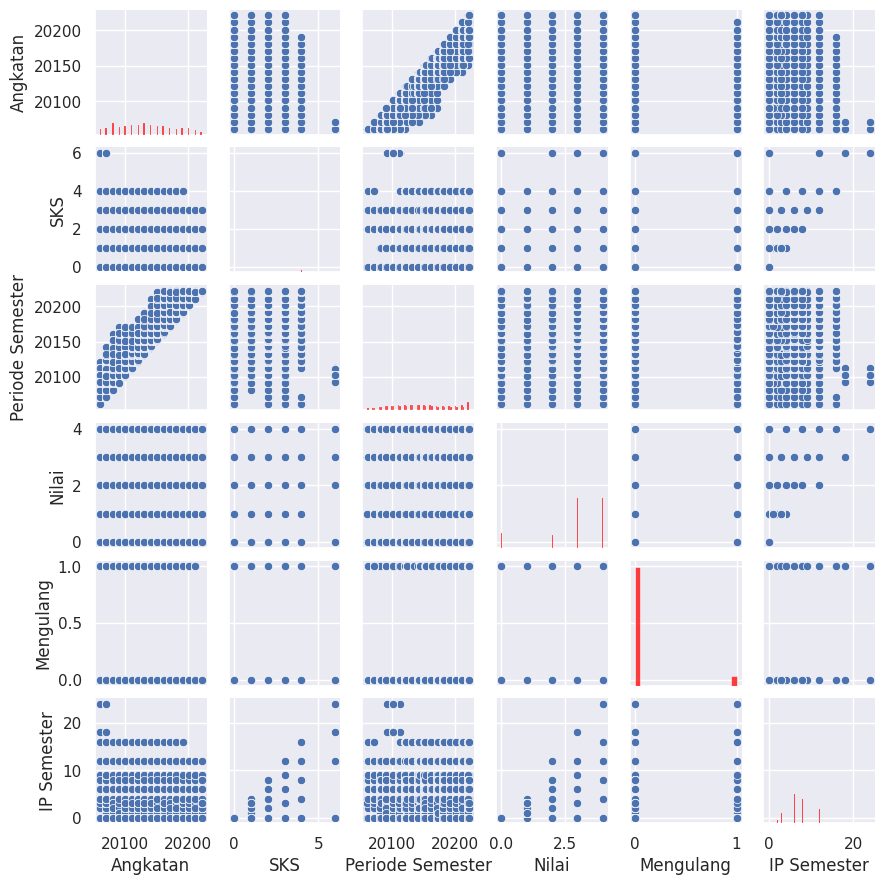

In [87]:
sns.pairplot(df, height=1.5,diag_kws={'color':'red'})
plt.show()

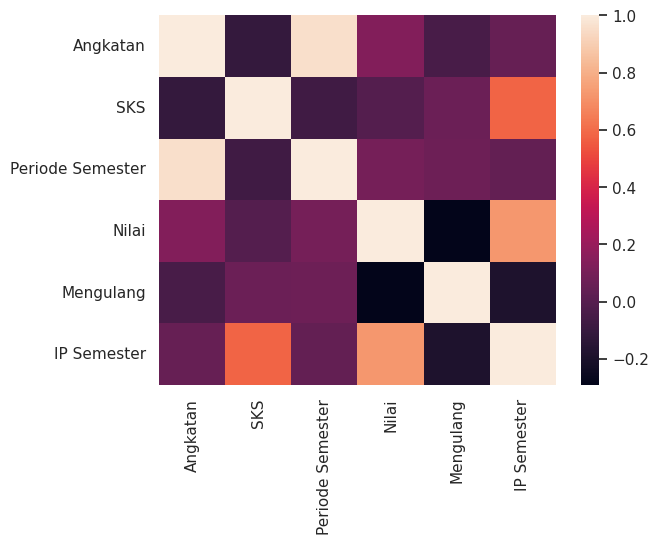

In [88]:
sns.heatmap(df.corr());

In [ ]:
df

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf,Nilai,Mengulang
3,206700066,ABDUL HANAN,20061,201004-705-02-005,2.0,ULUMUL QURAN,20061,A,4,False
4,206700066,ABDUL HANAN,20061,201004-705-02-010,2.0,BAHASA ARAB,20061,A,4,False
5,206700066,ABDUL HANAN,20061,201004-705-02-003,2.0,BAHASA INDONESIA,20061,B,3,False
6,206700066,ABDUL HANAN,20061,201004-705-02-011,2.0,BAHASA INGGRIS,20061,B,3,False
7,206700066,ABDUL HANAN,20061,201004-705-02-013,3.0,FISIKA DASAR,20061,C,2,False
...,...,...,...,...,...,...,...,...,...,...
190269,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-003,2.0,BAHASA INDONESIA,20222,A,4,False
190270,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-005,2.0,ULUMUL QURAN,20222,A,4,False
190271,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-02-012,2.0,BAHASA INGGRIS II,20222,A,4,False
190272,1227050138,ZULFAN AL-ZAHWAN PUTRA ASHADI,20221,201004-705-03-012,0.0,PRAKTEK IBADAH,20222,E,0,False


# Klasifikasi



---



## Klasifikasi Berdasarkan IPK

In [81]:
# Convert 'Nilai' column to numeric, handling errors by setting them to NaN
df['Nilai'] = pd.to_numeric(df['Nilai'], errors='coerce')

# Calculate IP Semester
df['IP Semester'] = df['Nilai'] * df['SKS']

# Group by 'NIM', 'Nama', 'Angkatan', 'Periode Semester', and then sum the 'IP Semester' for each group
grouped_df = df.groupby(['NIM', 'Nama', 'Angkatan', 'Periode Semester']).agg({'IP Semester': 'sum', 'SKS': 'sum'}).reset_index()

# Calculate 'IP Semester' by dividing 'IP Semester' by 'SKS'
grouped_df['IP Semester'] = grouped_df['IP Semester'] / grouped_df['SKS']

# Calculate IPK
grouped_df['IPK'] = grouped_df.groupby(['NIM', 'Nama', 'Angkatan'])['IP Semester'].cumsum() / (grouped_df.groupby(['NIM', 'Nama', 'Angkatan']).cumcount() + 1)

# Tambahkan kolom klasifikasi (label) berdasarkan IPK dan syarat nilai 0 dan 1
grouped_df['Klasifikasi'] = grouped_df.apply(
    lambda row: 'Berprestasi' if (row['IPK'] >= 3.0) and (0 not in df[(df['NIM'] == row['NIM']) & (df['Nama'] == row['Nama']) & (df['Nilai'].isin([0, 1])) & (df['Periode Semester'] == row['Periode Semester'])].values) else 'Tidak Berprestasi',
    axis=1
)

# Pisahkan variabel klasifikasi dari perhitungan IP dan IPK
klasifikasi_data = grouped_df[['IPK', 'Klasifikasi']].copy()

# Hapus baris dengan nilai NaN
klasifikasi_data = klasifikasi_data.dropna()

# Bagi data menjadi data latih dan data uji
train_data, test_data, train_labels, test_labels = train_test_split(
    klasifikasi_data[['IPK']], klasifikasi_data['Klasifikasi'], test_size=0.2, random_state=42
)

# Inisialisasi dan latih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(train_data, train_labels)

# Prediksi menggunakan data uji
predictions = model.predict(test_data)

# Evaluasi model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(test_labels, predictions))

Accuracy: 0.8118242466068553

Classification Report:
                   precision    recall  f1-score   support

      Berprestasi       0.74      0.78      0.76      1680
Tidak Berprestasi       0.86      0.83      0.84      2667

         accuracy                           0.81      4347
        macro avg       0.80      0.81      0.80      4347
     weighted avg       0.81      0.81      0.81      4347



In [89]:
conf_matrix = confusion_matrix(test_labels, predictions)

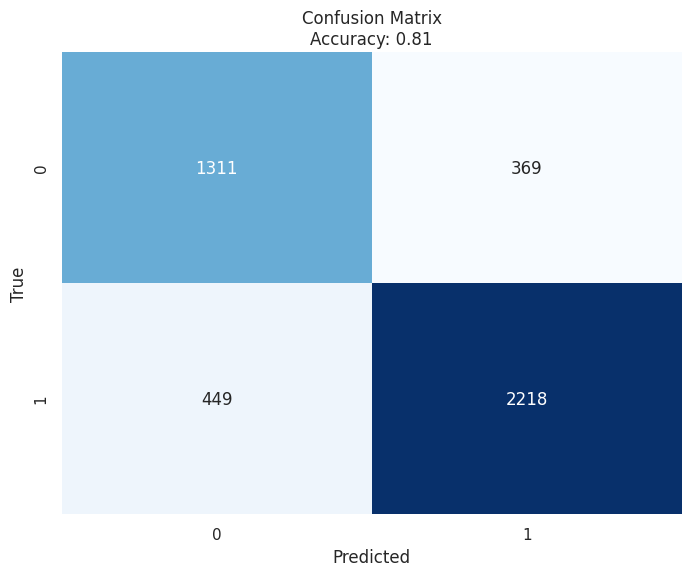

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()

In [82]:
# Menampilkan kolom-kolom yang memiliki nilai NaN
columns_with_nan = df.columns[df.isna().any()].tolist()
print("Kolom dengan nilai NaN:", columns_with_nan)


Kolom dengan nilai NaN: []


In [83]:
# Print hasil klasifikasi
print("\nHasil Klasifikasi:")
display(grouped_df[['NIM', 'Nama', 'Angkatan', 'Periode Semester', 'IP Semester', 'SKS', 'IPK', 'Klasifikasi']])



Hasil Klasifikasi:


,NIM,Nama,Angkatan,Periode Semester,IP Semester,SKS,IPK,Klasifikasi
0,1127050001,ACHMAD ALFIAN R,20121,20121,3.238095,21.0,3.238095,Berprestasi
1,1127050001,ACHMAD ALFIAN R,20121,20122,3.583333,24.0,3.410714,Berprestasi
2,1127050001,ACHMAD ALFIAN R,20121,20131,3.304348,23.0,3.375259,Berprestasi
3,1127050001,ACHMAD ALFIAN R,20121,20132,3.375000,24.0,3.375194,Berprestasi
4,1127050001,ACHMAD ALFIAN R,20121,20141,3.090909,22.0,3.318337,Berprestasi
...,...,...,...,...,...,...,...,...
21738,208701055,Siti Saidah,20081,20101,3.043478,23.0,3.294807,Berprestasi
21739,208701055,Siti Saidah,20081,20102,3.260870,23.0,3.289151,Berprestasi
21740,208701055,Siti Saidah,20081,20111,3.050000,20.0,3.254986,Tidak Berprestasi
21741,208701055,Siti Saidah,20081,20112,3.500000,4.0,3.285613,Berprestasi


In [84]:
# Simpan DataFrame ke file CSV
grouped_df.to_csv('data_klasifikasi.csv', index=False)

# Konfirmasi penyimpanan
print("Data berhasil disimpan ke file data_kelasifikasi.csv")

Data berhasil disimpan ke file data_kelasifikasi.csv


## Null

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengubah 'Nama Mata Kuliah' menjadi nilai numerik
le_mk = LabelEncoder()
df['Nama Mata Kuliah'] = le_mk.fit_transform(df['Nama Mata Kuliah'])

# Memilih fitur-fitur untuk klasifikasi Mata Kuliah
features_mata_kuliah = ['Nama Mata Kuliah', 'Nilai']

# Menambahkan kolom target 'Lulus' atau 'Tidak Lulus' pada suatu Mata Kuliah
df['Lulus'] = np.where(df['Nilai'] >= 2.5, 'Lulus', 'Tidak Lulus')

# Memisahkan data menjadi data latih dan uji untuk klasifikasi Mata Kuliah
X_train_mata_kuliah, X_test_mata_kuliah, y_train_mata_kuliah, y_test_mata_kuliah = train_test_split(df[features_mata_kuliah], df['Lulus'], test_size=0.2, random_state=42)

# Pemodelan Klasifikasi Mata Kuliah dengan Decision Tree Classifier
clf_mata_kuliah = DecisionTreeClassifier(random_state=42)
clf_mata_kuliah.fit(X_train_mata_kuliah, y_train_mata_kuliah)

# Melakukan prediksi pada data uji Mata Kuliah
y_pred_mata_kuliah = clf_mata_kuliah.predict(X_test_mata_kuliah)

# Evaluasi Model Mata Kuliah
accuracy_mata_kuliah = accuracy_score(y_test_mata_kuliah, y_pred_mata_kuliah)
classification_rep_mata_kuliah = classification_report(y_test_mata_kuliah, y_pred_mata_kuliah)

# Menambahkan kolom 'Prediksi Mata Kuliah' ke DataFrame sebagai hasil prediksi
df['Prediksi Mata Kuliah'] = clf_mata_kuliah.predict(df[features_mata_kuliah])

# Menampilkan DataFrame hasil klasifikasi Mata Kuliah dengan kolom NIM, Nama, Nama Mata Kuliah, Nilai, dan Prediksi Mata Kuliah
df_result_mata_kuliah = df[['NIM', 'Nama', 'Nama Mata Kuliah', 'Nilai', 'Lulus', 'Prediksi Mata Kuliah']].drop_duplicates()
df_result_mata_kuliah['Nama Mata Kuliah'] = le_mk.inverse_transform(df_result_mata_kuliah['Nama Mata Kuliah'])  # Mengubah kembali menjadi teks
print(df_result_mata_kuliah)

# Menampilkan hasil evaluasi Mata Kuliah
print('Evaluasi Model Mata Kuliah:')
print(f'Accuracy: {accuracy_mata_kuliah:.2f}')
print('\nClassification Report:\n', classification_rep_mata_kuliah)


               NIM             Nama         Nama Mata Kuliah  Nilai  \
0              NIM    MUHAMAD AZHAR            Kerja Praktek    0.0   
1              NIM    MUHAMAD AZHAR             Komprehensif    0.0   
2              NIM    MUHAMAD AZHAR       Tugas AkhirSkripsi    0.0   
3              NIM      ABDUL HANAN  AlQuran Dan Ilmu Tafsir    4.0   
4              NIM      ABDUL HANAN            Bahasa Arab I    4.0   
...            ...              ...                      ...    ...   
192031  1237050151  OMAR HASSAN NOR             Fisika Dasar    0.0   
192032  1237050151  OMAR HASSAN NOR   Praktikum Fisika Dasar    0.0   
192033  1237050151  OMAR HASSAN NOR                Olah Raga    0.0   
192034  1237050151  OMAR HASSAN NOR          Praktek Tilawah    0.0   
192035  1237050151  OMAR HASSAN NOR          Kewarganegaraan    0.0   

              Lulus Prediksi Mata Kuliah  
0       Tidak Lulus          Tidak Lulus  
1       Tidak Lulus          Tidak Lulus  
2       Tidak Lulu



---

